# World Trade Multiplex Network: reproducing results about multiplexity

Some results from Barigozzi et al. and Gemmetto et al. are reproduced in this notebook.


* [Barigozzi et al 09] "Multinetwork of international trade: a commodity-specific analysis" arxiv:0908.1879
* [Gemmetto et al. 16] "Multiplexity and multireciprocity in directed multiplexes" arxiv:1411.1282
* [Gemmetto 18] "On metrics and models for multiplex networks" http://hdl.handle.net/1887/61132


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pymnet import *
from mplex.measure import *
from mplex.comtrade_multiplex import get_mplex_comtrade
from mplex.mplexio import *

#TODO: remove that
ROOT_DIR = '/home/aurelien/local/data/comtrade'

## Aggregate

The aggregate network is computed for the sake of comparison.

# cf comtrade: compare_agg_disagg_igraph()

## Layer-by-layer network statistics

* backbone
* density 
* knn
* c
* bc
* gini 


* spatial coords

In [2]:
list_barigozzi= [9,10,27,29,30,39,52,71,72,84,85,90,90,93]

## Multiplexity: Undirected Binary Configuration Model (UBCM)

*  "Such an array generally shows very high overlaps between layers, i.e. between different classes of
commodities, pointing out that usually each country tends to import from or
export to the same set of countries almost independently of the traded items" [Gemmetto 18] p.21
*  "a significant amount of the binary overlap observed in this network is actually due to the information included
in the degree sequence of the various layers, rather than to a real dependence
between layers. This method is therefore able to detect the really meaningful
similarity between layers, discarding the trivial overlap caused by the presence, for
instance, of nodes having a high number of connections in most of the layers." [Gemmetto 18] p.22

Rappel:
* $m^{\alpha\beta}_{b} = 2 \frac{ \sum_{i<j} \min( a^{\alpha}_{ij} a^{\beta}_{ij} )  }{L^\alpha + L^\beta } $
* $ \mu^{\alpha\beta}_{b} = \frac{ m^{\alpha\beta}_{b} - \langle m^{\alpha\beta}_{b} \rangle}{ 1-  \langle m^{\alpha\beta}_{b} \rangle  }$


In [3]:
mplex_com_undir_full =get_mplex_comtrade(year="2000", agg=False,forceUndirected=True,backend="igraph")
#mplex_com_undir = dict(filter(lambda x: x[0][-1]=='0' ,[(k,v)  for (k,v) in mplex_com_undir_full.items()]))
mplex_com_undir = dict(filter(lambda x: int(x[0]) in list_barigozzi ,[(k,v)  for (k,v) in mplex_com_undir_full.items()]))

d_pipj = fit_UBCM(mplex_com_undir)


/home/aurelien/local/git/mplex/measure.py:446: UserWarning: layer 39 : solve_eq_UBCM did not converge
  else: warnings.warn('layer {} : solve_eq_UBCM did not converge'.format(layer))
/home/aurelien/local/git/mplex/measure.py:446: UserWarning: layer 29 : solve_eq_UBCM did not converge
  else: warnings.warn('layer {} : solve_eq_UBCM did not converge'.format(layer))
/home/aurelien/local/git/mplex/measure.py:446: UserWarning: layer 30 : solve_eq_UBCM did not converge
  else: warnings.warn('layer {} : solve_eq_UBCM did not converge'.format(layer))
/home/aurelien/local/git/mplex/measure.py:446: UserWarning: layer 85 : solve_eq_UBCM did not converge
  else: warnings.warn('layer {} : solve_eq_UBCM did not converge'.format(layer))
/home/aurelien/local/git/mplex/measure.py:446: UserWarning: layer 71 : solve_eq_UBCM did not converge
  else: warnings.warn('layer {} : solve_eq_UBCM did not converge'.format(layer))


In [4]:
mplex = mplex_com_undir
layers = get_layers(mplex)
lo_glob_bin = link_overlap(mplex,layers,binary=True)
nlink = multiplex_nlink(mplex)
lo_nor = link_overlap_normalize(lo_glob_bin, nlink)
lo_avg = link_overlap_average(nlink, d_pipj, model='UBCM')
# some layers might be missing in lo_avg
lo_resc = link_overlap_rescale(lo_nor, lo_avg, layers= lo_avg.keys(), binary=True)

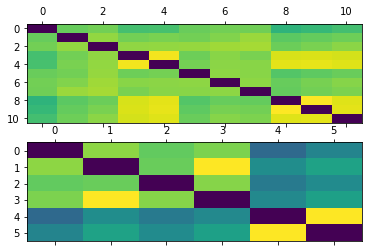

In [6]:
plot_overlap_mat(lo_nor,lo_resc)
#print(lo_resc)

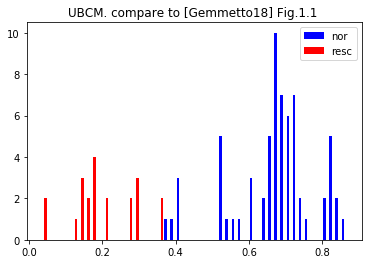

In [7]:
#https://matplotlib.org/gallery/statistics/histogram_multihist.html#sphx-glr-gallery-statistics-histogram-multihist-py
colors=['b','r']; labels=['nor','resc']
n_bins=50
plt.hist( [list(lo_nor.values()), list(lo_resc.values())], n_bins,
            histtype='bar', color=colors, label=labels)
plt.title('UBCM. compare to [Gemmetto18] Fig.1.1 ')
plt.legend()
plt.show()

z-score: $z[ m^{\alpha\beta}_{b} ]= \frac{ m^{\alpha\beta}_{b} - \langle m^{\alpha\beta}_{b} \rangle}{\sigma[ m^{\alpha\beta}_{b}]}$

* "all the z-scores are higher than the widely used critical $z^∗_{BCM}= 2$ (...) that most
of the pairs therefore exhibit unexpectedly high correlations with respect to the
corresponding average value obtained when randomizing the real-world layers ac-
cording to the Configuration Mode" [Gemmetto 18] p.43
* the z-score are higher with the RG model than with the BCM.

"we can instead
make use of $\mu^{\alpha\beta}_{BCM}$ to implement an improved hierarchical clustering procedure"  [Gemmetto 18] p.22

## Multiplexity: Directed Binary Configuration Model (DBCM)

?

## Multiplexity: Undirected Weighted Configuration Model (UBCM)

* $m^{\alpha\beta}_{w}$ : "several pairs of commodities are now actually uncorrelated, as expected when the weights of the links are taken into account" [Gemmetto 18] p.24
* $ \mu^{\alpha\beta}_{WRG}$ : "strongly uncorrelated behavior associated to most of the pairs of commodities" p.24
* $ \mu^{\alpha\beta}_{WCM}$: "several pairs are still correlated, even in the weighted case, some of them are actually uncorrelated, (...) and only a few, with respect to the Weighted Random Graph case, remain anti-correlated"
* cf [Gemmetto 18]  Fig 1.9

presence of hubs ? [Gemmetto 18] 1.3.3; fig 1.4

z-scores:
* WRG: weak correlation
* WCM : "such a weak correlation between weighted multiplexity and the corresponding z-score completely disappears when the considered benchmark is the Weighted Configuration Model (Figure 1.9(b)): in this case the same value
of $ \mu^{\alpha\beta}_{WCM}$"

## Multiplexity: Directed Weighted Configuration Model (DWCM)

?

## Filtering

## Conclusions

* "World Trade Multiplex Network (WTM), most of the pairs of nodes are connected in several layers, so that such multiplexes exhibit large overlap" NB: not the case with airport network.
* 